In [2]:


#Importing the dependecies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from xgboost import XGBRegressor

import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [3]:
#Data Collection & Analysis

big_mart_data = pd.read_csv('Train-Set.csv')
big_mart_data.head()




,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#number of data points & number of features
big_mart_data.shape

(8523, 12)

In [5]:
# getting information about the dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorial Features :

 - ProductID
 - FatContent
 - ProductType
 - OutletID
 - OutletSize
 - LocationType
 - OutletType

In [6]:
# checking for missing  values
big_mart_data.isnull().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

Handling missing values

Will fill the empty slots using two parameters :
* Mean --> average value  { Weight }
* Mode --> most repeated value { used for categorial feature / OutletSize }

In [7]:
# finding mean value of weight column
big_mart_data['Weight'].mean()

12.857645184135976

In [8]:
# filling the missing values in "Weight" column with "Mean" value
big_mart_data['Weight'].fillna(big_mart_data['Weight'].mean , inplace = True)

In [9]:
# checking for missing values
big_mart_data.isnull().sum()

ProductID               0
Weight                  0
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

Replacing the missing values in 'OutletSize' column with mode
* We included the OutletType column in pivot_table function because the values of OutletSize are in 
correspondence to the the fromer and hence when we will be filling the missing values ,  we will be doing so according to the type of the outlet . 

* For example - Grocery outlets usually being small in size so the mode value comes out to be small therfore empty slots will be replaced with small in OutletSize column corresponding to grocery catergory in OutletType .


In [10]:
mode_of_outlet_size = big_mart_data.pivot_table(values='OutletSize', columns='OutletType' , aggfunc=(lambda x : x.mode()[0]))
print(mode_of_outlet_size)

OutletType Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
OutletSize         Small             Small            Medium            Medium


In [11]:
# Separating and storing the missing values 
missing_values = big_mart_data['OutletSize'].isnull()
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: OutletSize, Length: 8523, dtype: bool


In [12]:
# Replacing the missing values with mode by using locate 
big_mart_data.loc[missing_values,'OutletSize'] = big_mart_data.loc[missing_values ,'OutletType'].apply(lambda x : mode_of_outlet_size)

In [13]:
# Verifying missing values are filled
big_mart_data.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

Data Analysis

In [14]:
# statistical measures about the data
big_mart_data.describe()

,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [15]:
sns.set()

In [16]:
# item weight distribution
'''
plt.figure(figsize= (6,6)) 
sns.distplot( big_mart_data['Weight'] )
plt.show()
'''


"\nplt.figure(figsize= (6,6)) \nsns.distplot( big_mart_data['Weight'] )\nplt.show()\n"

Plotting categorial columns

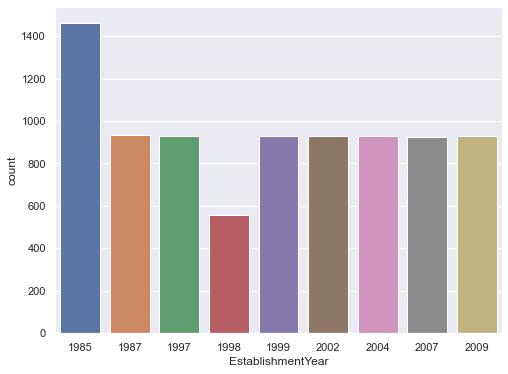

In [17]:
# Estabilishment year visualisation
plt.figure(figsize= (8,6)) 
sns.countplot(x='EstablishmentYear' , data = big_mart_data)
plt.show()

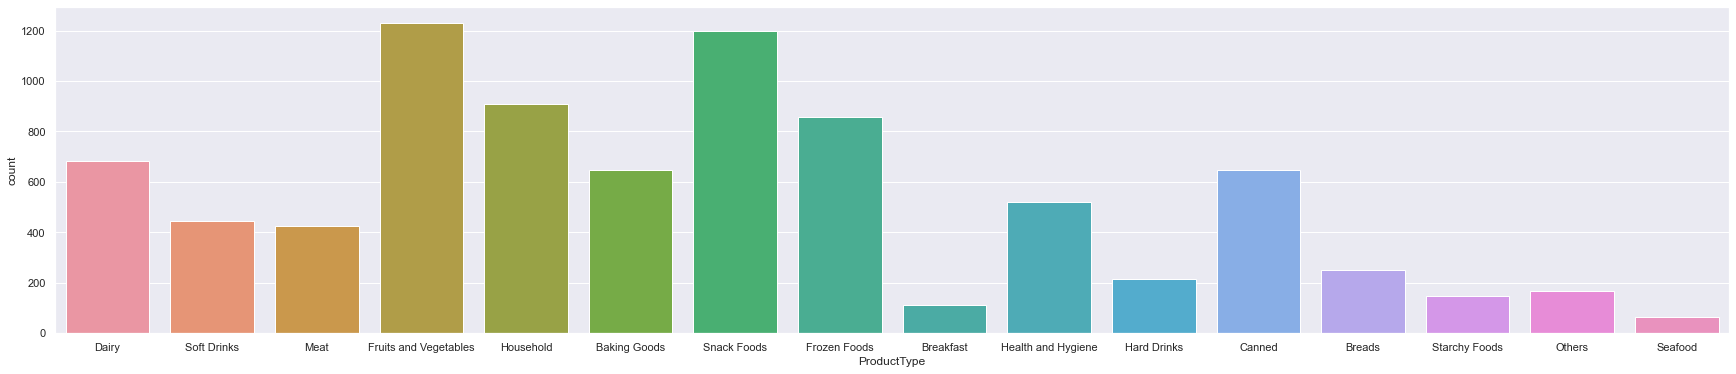

In [18]:
# Product type visualisation
plt.figure(figsize= (30,6)) 
sns.countplot(x='ProductType' , data = big_mart_data)
plt.show()

In [19]:
# OutletSize visualisation
'''
plt.figure(figsize= (6,6)) 
sns.countplot(x='OutletSize' , data = big_mart_data)
plt.show()
'''

"\nplt.figure(figsize= (6,6)) \nsns.countplot(x='OutletSize' , data = big_mart_data)\nplt.show()\n"

Data Pre-Processing :
- Processing categorial data to make it reduntant

In [20]:
# viewing the repeated categories
big_mart_data['FatContent'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: FatContent, dtype: int64

In [21]:
# combining the sub-categories like 'reg' and 'Regular'
big_mart_data.replace({'FatContent' : {'LF': 'Low Fat' , 'low fat' : 'Low Fat' , 'reg' : 'Regular'}} , inplace=True)
#verifying
big_mart_data['FatContent'].value_counts()

Low Fat    5517
Regular    3006
Name: FatContent, dtype: int64

Label Encoding
- converting categorial data to numerical data

In [22]:
encoder = LabelEncoder()

In [23]:
big_mart_data['ProductID'] = encoder.fit_transform(big_mart_data['ProductID'])
big_mart_data['FatContent'] = encoder.fit_transform(big_mart_data['FatContent'])
big_mart_data['ProductType'] = encoder.fit_transform(big_mart_data['ProductType'])
big_mart_data['LocationType'] = encoder.fit_transform(big_mart_data['LocationType'])
big_mart_data['OutletType'] = encoder.fit_transform(big_mart_data['OutletType'])
big_mart_data['OutletID'] = encoder.fit_transform(big_mart_data['OutletID'])



In [24]:
big_mart_data.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,156,9.3,0,0.016047,4,249.8092,9,1999,Medium,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,662,17.5,0,0.016760,10,141.6180,9,1999,Medium,0,1,2097.2700
3,1121,19.2,1,0.000000,6,182.0950,0,1998,OutletType Grocery Store Supermarket Type1 Sup...,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,High,2,1,994.7052


In [25]:
big_mart_data.dtypes

ProductID              int32
Weight                object
FatContent             int32
ProductVisibility    float64
ProductType            int32
MRP                  float64
OutletID               int32
EstablishmentYear      int64
OutletSize            object
LocationType           int32
OutletType             int32
OutletSales          float64
dtype: object

Splitting Features and Target

In [26]:

X = big_mart_data.drop(columns = ['OutletSales',  'Weight', 'OutletSize'  ])


Y = big_mart_data['OutletSales']

print(X)

      ProductID  FatContent  ProductVisibility  ProductType       MRP  \
0           156           0           0.016047            4  249.8092   
1             8           1           0.019278           14   48.2692   
2           662           0           0.016760           10  141.6180   
3          1121           1           0.000000            6  182.0950   
4          1297           0           0.000000            9   53.8614   
...         ...         ...                ...          ...       ...   
8518        370           0           0.056783           13  214.5218   
8519        897           1           0.046982            0  108.1570   
8520       1357           0           0.035186            8   85.1224   
8521        681           1           0.145221           13  103.1332   
8522         50           0           0.044878           14   75.4670   

      OutletID  EstablishmentYear  LocationType  OutletType  
0            9               1999             0           1  

In [27]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: OutletSales, Length: 8523, dtype: float64


Splitting the data into Training data & Testing data

In [28]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [29]:
print(X.shape, X_train.shape , X_test.shape)

(8523, 9) (6818, 9) (1705, 9)


Model Training - XGB REGRESSOR

In [30]:

regressor = XGBRegressor()
regressor.fit(X_train,Y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

Evaluation

In [31]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [32]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [33]:
print('R Squared value = ', r2_train)

R Squared value =  0.8488848609068753


In [34]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [35]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [36]:
print('R Squared value = ', r2_test)

R Squared value =  0.5376898974514046
